### Importation des librairies

In [36]:
import pandas as pd
import  matplotlib.pyplot as plt
import requests
import  math
import seaborn as sns
import numpy as np

##### Fonction à utiliser.

In [3]:
def verifier_format_codeCommune(col_code_commune):
    """
    Fonction qui vérifie le format d'un code commune et extrait une partie du nombre.
    
    Paramètre:
    col_code_commune (int): Le code de la commune sous forme d'un nombre entier.
    
    Retourne:
    int: Si le code a 5 chiffres, retourne les deux premiers chiffres.
         Sinon, retourne uniquement le premier chiffre.
    """

    # Calcul du nombre de chiffres dans le code de la commune
    chiffre = math.floor(math.log10(abs(col_code_commune))) + 1  

    if chiffre == 5:  
        # Si le code contient exactement 5 chiffres, on extrait les deux premiers chiffres
        return col_code_commune // 10**3  
    else:  
        # Sinon, on extrait uniquement le premier chiffre
        return col_code_commune // 10**(chiffre - 1)  




def completer_code_departement(code_commune, code_departement):
    if code_departement == 0:  # Vérifie si la valeur du code de département est vide (NaN dans ce contexte)
        code_departement = verifier_format_codeCommune(code_commune)  # Si vide, on complète le code de département avec la fonction 'verifier_format_codeCommune' utilisant le code de la commune
        
    return code_departement  # Retourne le code de département (complété ou non)


def taux_valeur_manquantes(df_):
    cols = []  # Liste pour stocker les noms des colonnes
    taux = []  # Liste pour stocker les taux de valeurs manquantes
    qte = []  # Liste pour stocker les quantités de valeurs manquantes
    nbre_ind = df_.shape[0]  # Nombre total d'individus (lignes) dans le DataFrame

    # Parcours des colonnes du DataFrame
    for col in df_.columns:
        cols.append(col)  # Ajouter le nom de la colonne à la liste 'cols'
        qte.append(df_[col].isna().sum())  # Calculer et ajouter la quantité de valeurs manquantes pour la colonne
        taux.append((qte[-1] / nbre_ind) * 100)  # Calculer et ajouter le taux de valeurs manquantes en pourcentage

    # Créer un DataFrame pour afficher les résultats : noms des colonnes, quantité et taux de valeurs manquantes
    taux_df = pd.DataFrame({"variables": cols, "nbrs valeurs manquantes": qte, "taux valeurs manquantes en (%)": taux})

    return taux_df  # Retourner le DataFrame contenant les résultats


def completer_type_voie(adresse, type_voie):
    if type_voie == "":  # Vérifie si la valeur du type de voie est vide (NaN dans ce contexte)
        for type_v in types_de_voie:  # Parcourt la liste des types de voie disponibles
            if type_v in adresse:  # Si un type de voie de la liste est trouvé dans l'adresse
                return type_v  # Retourne le type de voie trouvé dans l'adresse
    return type_voie  # Si le type de voie est déjà renseigné, retourne la valeur d'origine



# Premier jeu de données: Consommation-annuelle-residentielle-par-adresse

In [5]:
df = pd.read_csv("Data/consommation-annuelle-residentielle-par-adresse.csv", sep = ";")
df.head()

,Année,Code IRIS,Nom IRIS,Numéro de voie,Indice de répétition,Type de voie,Libellé de voie,Code Commune,Nom Commune,Segment de client,Nombre de logements,Consommation annuelle totale de l'adresse (MWh),Consommation annuelle moyenne par logement de l'adresse (MWh),Consommation annuelle moyenne de la commune (MWh),Adresse,Code EPCI,Code Département,Code Région,Tri des adresses
0,2023,315552005,Observatoire,8.0,NaN,RUE,JOACHIM GENARD,31555,Toulouse,RESIDENTIEL,11,19.919,1.811,2.747,8 RUE JOACHIM GENARD,243100518.0,31.0,76.0,360010
1,2023,315552005,Observatoire,11.0,NaN,RUE,JOACHIM GENARD,31555,Toulouse,RESIDENTIEL,10,16.378,1.638,2.747,11 RUE JOACHIM GENARD,243100518.0,31.0,76.0,360018
2,2023,315552005,Observatoire,10.0,NaN,RUE,JOACHIM GENARD,31555,Toulouse,RESIDENTIEL,11,17.500,1.591,2.747,10 RUE JOACHIM GENARD,243100518.0,31.0,76.0,360019
3,2023,315552005,Observatoire,8.0,NaN,RUE,JOHANNES KEPLER,31555,Toulouse,RESIDENTIEL,10,15.853,1.585,2.747,8 RUE JOHANNES KEPLER,243100518.0,31.0,76.0,360024
4,2023,315552001,Arago,11.0,NaN,RUE,JOLIMONT,31555,Toulouse,RESIDENTIEL,21,84.084,4.004,2.747,11 RUE JOLIMONT,243100518.0,31.0,76.0,360036


In [7]:
df.shape

(2395046, 19)

In [8]:
##### Visualisation du type des différentes variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2395046 entries, 0 to 2395045
Data columns (total 19 columns):
 #   Column                                                         Dtype  
---  ------                                                         -----  
 0   Année                                                          int64  
 1   Code IRIS                                                      object 
 2   Nom IRIS                                                       object 
 3   Numéro de voie                                                 float64
 4   Indice de répétition                                           object 
 5   Type de voie                                                   object 
 6   Libellé de voie                                                object 
 7   Code Commune                                                   int64  
 8   Nom Commune                                                    object 
 9   Segment de client                             

In [9]:
df.isna().sum()

Année                                                                  0
Code IRIS                                                              0
Nom IRIS                                                               0
Numéro de voie                                                         5
Indice de répétition                                             2264886
Type de voie                                                        8651
Libellé de voie                                                        0
Code Commune                                                           0
Nom Commune                                                           58
Segment de client                                                      0
Nombre de logements                                                    0
Consommation annuelle totale de l'adresse (MWh)                        0
Consommation annuelle moyenne par logement de l'adresse (MWh)          0
Consommation annuelle moyenne de la commune (MWh)  

In [11]:
pd.DataFrame({"nom": ["moi","toi"], "age": [10,25]})

,nom,age
0,moi,10
1,toi,25


#### Nettoyage des données.

In [51]:
data = df.copy()

###### Imputations des valeurs manquantes

In [53]:
#### Calcul du taux de valeur manquantes

def taux_valeur_manquantes(df_):
    cols = []
    taux = []
    qte = []
    nbre_ind = df_.shape[0]
    for col in df_.columns:
        cols.append(col)
        qte.append(df_[col].isna().sum())
        taux.append((qte[-1] / nbre_ind) * 100)

    taux_df = pd.DataFrame({"variables": cols, "nbrs valeurs manquantes": qte, "taux valeurs manquantes en (%)": taux})

    return taux_df

In [55]:
valeurs_manquantes = taux_valeur_manquantes(data)
valeurs_manquantes

,variables,nbrs valeurs manquantes,taux valeurs manquantes en (%)
0,Année,0,0.000000
1,Code IRIS,0,0.000000
2,Nom IRIS,0,0.000000
3,Numéro de voie,5,0.000209
4,Indice de répétition,2264886,94.565449
5,Type de voie,8651,0.361204
6,Libellé de voie,0,0.000000
7,Code Commune,0,0.000000
8,Nom Commune,58,0.002422
9,Segment de client,0,0.000000


La variable "Indice de répétition" présente un enorme taux de valuer manquantes (< 94%), ainsi, il ne serai pertinent de la garder.

In [57]:
data.drop("Indice de répétition", axis = 1, inplace = True)

In [59]:
data["Type de voie"] = data["Type de voie"].fillna("")

In [61]:
l = ["a","b","fg"]
l.remove("b")
l

['a', 'fg']

In [20]:
# ###### Imputation des valeurs manquantes pour les variables "type de voie", "numéro de voie"
# # type_de_route = df["Type de voie"].unique().tolist()

# for i, row in data.iterrows():
    
#     adresse = row["Adresse"] #
#     # if pd.isna(data.loc[i,"Type de voie"]):
#     #     if "GRANDE RUE" in adresse:
#     #         data.loc[i, "Type de voie"] = "GRANDE RUE"
#     #     elif "AVENUE" in adresse: 
#     #         data.loc[i, "Type de voie"] = "AVENUE"

#     for type in data["Type de voie"].unique():
        
#         if type in adresse: 
#             data.loc[i, "Type de voie"] = type

In [63]:
# Liste des types de voie uniques
types_de_voie = data["Type de voie"].dropna().unique()


# Appliquer la fonction `completer_type_voie` sur chaque ligne de la colonne "Type de voie" en utilisant l'adresse
data["Type de voie"] = data.apply(lambda row: completer_type_voie(row["Adresse"], row["Type de voie"]), axis=1)


In [64]:
(data["Type de voie"] == "").sum()

4088

In [ ]:
data.describe()

In [65]:
data["Type de voie"].replace("", data["Type de voie"].mode()[0], inplace = True)

C:\Users\Gilles2608\AppData\Local\Temp\ipykernel_15780\71426422.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Type de voie"].replace("", data["Type de voie"].mode()[0], inplace = True)


In [66]:
data.loc[387766, "Numéro de voie"] = 4
data.loc[897875, "Numéro de voie"] = 3
data.loc[391696, "Numéro de voie"] = 137
data.loc[1187416, "Numéro de voie"] = 137
data.loc[2164831, "Numéro de voie"] = 137

In [67]:
data["Nom Commune"] = data["Nom Commune"].fillna("Florange") ### Recherche google de correspondance à partir du code commune et du code de departement.

In [73]:
data["Numéro de voie"] = data["Numéro de voie"].astype("Int64")
data["Code Commune"] = data["Code Commune"].astype("Int64")
data["Code Département"] = data["Code Département"].astype("Int64")

In [75]:
data["Nom Commune"].unique()

array(['Toulouse', 'Touques', 'Tourcoing', ..., 'FORCE', 'Grémonville',
       'Faucigny'], dtype=object)

In [39]:
data["Segment de client"].unique()

array(['RESIDENTIEL'], dtype=object)

Nous allons aussi  supprimer cette variable car elle ne contient q'une seule données identique pour tout les individus.

In [30]:
data.drop("Segment de client", axis = 1, inplace = True)

In [77]:
data[data["Code Département"] == 0]

,Année,Code IRIS,Nom IRIS,Numéro de voie,Type de voie,Libellé de voie,Code Commune,Nom Commune,Segment de client,Nombre de logements,Consommation annuelle totale de l'adresse (MWh),Consommation annuelle moyenne par logement de l'adresse (MWh),Consommation annuelle moyenne de la commune (MWh),Adresse,Code EPCI,Code Département,Code Région,Tri des adresses


In [79]:
data["Code Département"] = data["Code Département"].fillna(0)

In [81]:
# Appliquer la fonction sur la colonne "Code Département" pour chaque ligne du DataFrame
data["Code Département"] = data.apply(
    lambda row: completer_code_departement(row["Code Commune"], row["Code Département"]), 
    axis=1  # On applique la fonction ligne par ligne
)

Nous allons utiliser l'imputation par KNN pour les colonnes "Code EPCI" et "Code Région"

In [ ]:
# X_region = data["Code Region"]

In [ ]:
# from sklearn.impute import KNNImputer

# imputer = KNNImputer(n_neighbors = 5)
# X = imputer.fit_transform(X_region)
# X

In [83]:
# df_ = data[data["Code Région"].isna()]
# df_

,Année,Code IRIS,Nom IRIS,Numéro de voie,Type de voie,Libellé de voie,Code Commune,Nom Commune,Segment de client,Nombre de logements,Consommation annuelle totale de l'adresse (MWh),Consommation annuelle moyenne par logement de l'adresse (MWh),Consommation annuelle moyenne de la commune (MWh),Adresse,Code EPCI,Code Département,Code Région,Tri des adresses
16703,2018,012050000,Lancrans (commune non irisée),30,RUE,GRANDE RUE,1205,LANCRANS,RESIDENTIEL,11,73.606,6.691,6.241,30 GRANDE RUE,NaN,1,NaN,538683
21005,2018,850600103,La Ceinture,11,RUE,DE LA MER,85060,CHATEAU-D'OLONNE,RESIDENTIEL,14,40.093,2.864,4.893,11 RUE DE LA MER,NaN,85,NaN,472905
21006,2018,850600102,Les Plesses,10,IMPASSE,DE LA ROSE DES VENTS,85060,CHATEAU-D'OLONNE,RESIDENTIEL,12,63.891,5.324,4.893,10 IMPASSE DE LA ROSE DES VENTS,NaN,85,NaN,472915
21007,2018,850600105,Le Littoral,41,AVENUE,DE LA VENDEE,85060,CHATEAU-D'OLONNE,RESIDENTIEL,39,129.895,3.331,4.893,41 AVENUE DE LA VENDEE,NaN,85,NaN,472916
21008,2018,850600105,Le Littoral,5,RUE,DES MARINES,85060,CHATEAU-D'OLONNE,RESIDENTIEL,26,21.328,0.820,4.893,5 RUE DES MARINES,NaN,85,NaN,472924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2374607,2018,782510000,Fourqueux (commune non irisée),4,ALLEE,DES VIGNES,78251,FOURQUEUX,RESIDENTIEL,10,34.088,3.409,8.782,4 ALLEE DES VIGNES,NaN,78,NaN,515940
2375171,2018,853070000,La Faute-sur-Mer (commune non irisée),76,ROUTE,DE LA POINTE D ARCAY,85307,FAUTE-SUR-MER,RESIDENTIEL,12,16.400,1.367,2.896,76 ROUTE DE LA POINTE D ARCAY,NaN,85,NaN,510944
2375172,2018,853070000,La Faute-sur-Mer (commune non irisée),96,ROUTE,DE LA TRANCHE,85307,FAUTE-SUR-MER,RESIDENTIEL,141,177.635,1.260,2.896,96 ROUTE DE LA TRANCHE,NaN,85,NaN,510945
2384362,2019,212130000,Crimolois (commune non irisée),15,RUE,COMMANDANT CAROLINE AIGLE,21213,Crimolois,RESIDENTIEL,10,15.068,1.507,4.810,15 RUE COMMANDANT CAROLINE AIGLE,NaN,21,NaN,90030


In [85]:
data.isna().sum()

Année                                                              0
Code IRIS                                                          0
Nom IRIS                                                           0
Numéro de voie                                                     0
Type de voie                                                       0
Libellé de voie                                                    0
Code Commune                                                       0
Nom Commune                                                        0
Segment de client                                                  0
Nombre de logements                                                0
Consommation annuelle totale de l'adresse (MWh)                    0
Consommation annuelle moyenne par logement de l'adresse (MWh)      0
Consommation annuelle moyenne de la commune (MWh)                  0
Adresse                                                            0
Code EPCI                         

In [70]:
data.to_csv("Data\Cleanned Data\data_consommation_cleanned.csv")

<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:1: SyntaxWarning: invalid escape sequence '\C'
C:\Users\Gilles2608\AppData\Local\Temp\ipykernel_12144\3482616585.py:1: SyntaxWarning: invalid escape sequence '\C'
  data_.to_csv("Data\Cleanned Data\data_consommation_cleanned.csv")


#### Rélation entre les variables

Nous allons commencer par rénommer certaines colonnes pour plus de clarté:
-  Consommation annuelle totale de l'adresse (MWh):  Consommation annuelle par adresse
-  Consommation annuelle moyenne de la commune (MWh):  Consommation annuelle par logement
-  Consommation annuelle moyenne de la commune (MWh): Consommation annuelle par commune

###### - Consommation par commune / departement ou région

In [87]:
def visualiser_consommation(y_colonne, niveau,df):
    agg_df = df.groupby(niveau)[y_colonne].sum().reset_index()
    # Tri des valeurs pour une meilleure lisibilité
    agg_df = agg_df.sort_values(by = y_colonne, ascending = False)

    # Création du graphique
    plt.figure(figsize = (30,8))
    sns.barplot(data = agg_df, x = niveau, y = y_colonne, palette = "viridis")
    plt.show()
    

C:\Users\Gilles2608\AppData\Local\Temp\ipykernel_15780\816386405.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = agg_df, x = niveau, y = y_colonne, palette = "viridis")


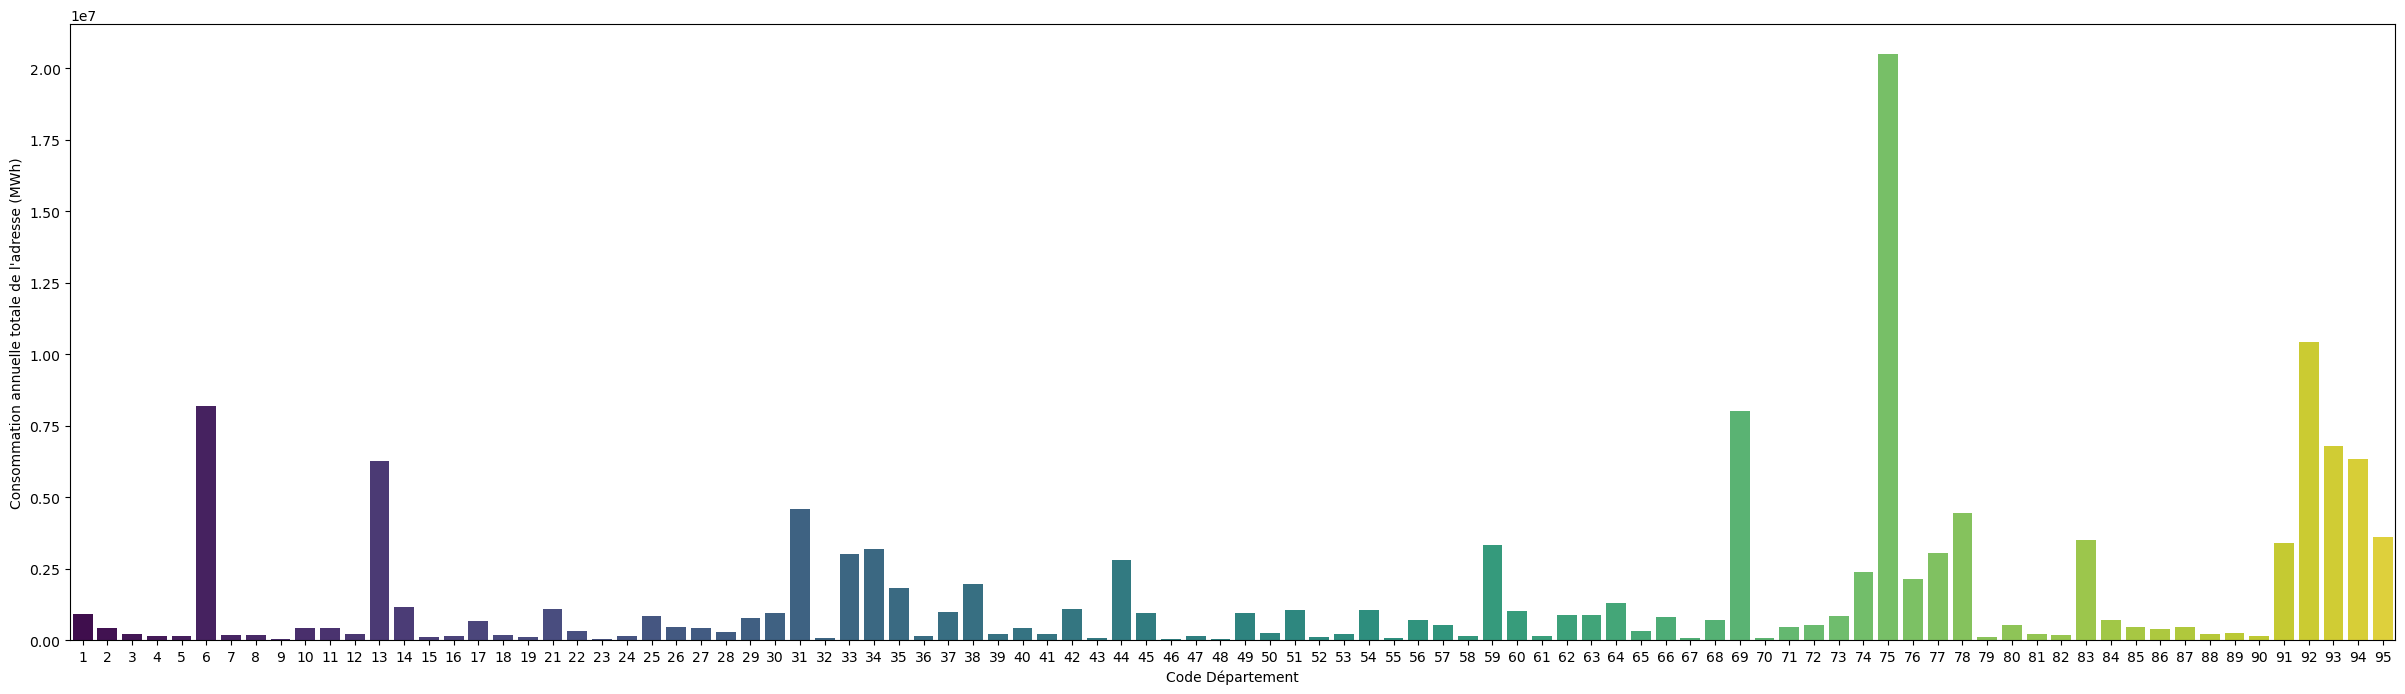

In [115]:
visualiser_consommation("Consommation annuelle totale de l'adresse (MWh)", "Code Département",data)

In [93]:
### Faire des réprésentation en fonction des département.
# Faire aussi une map qui représente ces département sur la carte de la france
# 

#### Gestion des valeurs abérantes et des corrélation

In [6]:
data_ = pd.read_csv("Data/Cleanned Data/data_consommation_cleanned.csv")
data_.drop(columns = ["Unnamed: 0"], inplace = True)

In [8]:
col_obj = data_.select_dtypes(include=["object"]).columns
data_num = data_.drop(columns = col_obj)
data_num.head()

,Année,Numéro de voie,Code Commune,Nombre de logements,Consommation annuelle totale de l'adresse (MWh),Consommation annuelle moyenne par logement de l'adresse (MWh),Consommation annuelle moyenne de la commune (MWh),Code EPCI,Code Département,Code Région,Tri des adresses
0,2023,8,31555,11,19.919,1.811,2.747,243100518.0,31,76.0,360010
1,2023,11,31555,10,16.378,1.638,2.747,243100518.0,31,76.0,360018
2,2023,10,31555,11,17.500,1.591,2.747,243100518.0,31,76.0,360019
3,2023,8,31555,10,15.853,1.585,2.747,243100518.0,31,76.0,360024
4,2023,11,31555,21,84.084,4.004,2.747,243100518.0,31,76.0,360036


In [10]:
data_num.describe()

,Année,Numéro de voie,Code Commune,Nombre de logements,Consommation annuelle totale de l'adresse (MWh),Consommation annuelle moyenne par logement de l'adresse (MWh),Consommation annuelle moyenne de la commune (MWh),Code EPCI,Code Département,Code Région,Tri des adresses
count,2.395046e+06,2.395046e+06,2.395046e+06,2.395046e+06,2.395046e+06,2.395046e+06,2.395046e+06,2.394616e+06,2.395046e+06,2.394618e+06,2.395046e+06
mean,2.020503e+03,5.660210e+01,6.073249e+04,2.251823e+01,5.931963e+01,2.757173e+00,3.447074e+00,2.134527e+08,6.055687e+01,4.369420e+01,2.649129e+05
std,1.699487e+00,1.915297e+02,2.757002e+04,2.180253e+01,6.298024e+01,1.665024e+00,9.146899e-01,2.048114e+07,2.759046e+01,3.190307e+01,1.860113e+05
min,2.018000e+03,0.000000e+00,1.004000e+03,1.000000e+01,1.000000e-02,1.000000e-03,1.438000e+00,2.000002e+08,1.000000e+00,1.100000e+01,1.000000e+00
25%,2.019000e+03,6.000000e+00,3.705400e+04,1.200000e+01,2.539200e+01,1.621000e+00,2.893000e+00,2.000548e+08,3.700000e+01,1.100000e+01,1.197530e+05
50%,2.021000e+03,1.700000e+01,6.926400e+04,1.600000e+01,4.121400e+01,2.215000e+00,3.157000e+00,2.000585e+08,6.900000e+01,3.200000e+01,2.395050e+05
75%,2.022000e+03,4.700000e+01,8.002100e+04,2.500000e+01,7.032600e+01,3.466000e+00,3.759000e+00,2.430006e+08,8.000000e+01,7.600000e+01,3.592570e+05
max,2.023000e+03,9.449000e+03,9.568200e+04,1.435000e+03,3.990484e+03,1.767440e+02,1.256600e+01,2.495005e+08,9.500000e+01,9.300000e+01,7.908900e+05


In [60]:
data_["Consommation annuelle totale de l'adresse (MWh)"].max()

137.726

In [14]:
##### Détection des valeurs abérrantes en utilisant la règles de l'écart interquantile (IQR)
def valeurs_aberrantes(df): 
    val_aberrantes = []
    for col in data_num.columns:
        IQR = df[col].quantile(0.75) - df[col].quantile(0.25) #Ecart interquantile
        bi = df[col].quantile(0.25) - 1.5*IQR # Borne inférieure
        bs = df[col].quantile(0.75) + 1.5*IQR # Borne supérieure
        nbr_valeurs_aberrates = df[(df[col] < bi) | (df[col] > bs)].shape[0] # Nombre de valeurs aberrantes
        taux = (nbr_valeurs_aberrates / df.shape[0]) * 100  # Taux en pourcentage
        if nbr_valeurs_aberrates > 0:
            val_aberrantes.append([col, nbr_valeurs_aberrates, round(taux, 2)])  # Arrondi à 2 décimales
    return pd.DataFrame(data = val_aberrantes, columns = ["columns", "Nbre_valeurs_aberrantes","taux_valeurs_aberrantes (%)"])
 


In [28]:
val_aberrantes = valeurs_aberrantes(data_num)
val_aberrantes

,columns,Nbre_valeurs_aberrantes,taux_valeurs_aberrantes (%)
0,Numéro de voie,256713,10.72
1,Nombre de logements,184648,7.71
2,Consommation annuelle totale de l'adresse (MWh),169902,7.09
3,Consommation annuelle moyenne par logement de ...,105244,4.39
4,Consommation annuelle moyenne de la commune (MWh),151349,6.32
5,Tri des adresses,72377,3.02


In [32]:
val_aberrantes["columns"].to_list()

['Numéro de voie',
 'Nombre de logements',
 "Consommation annuelle totale de l'adresse (MWh)",
 "Consommation annuelle moyenne par logement de l'adresse (MWh)",
 'Consommation annuelle moyenne de la commune (MWh)',
 'Tri des adresses']

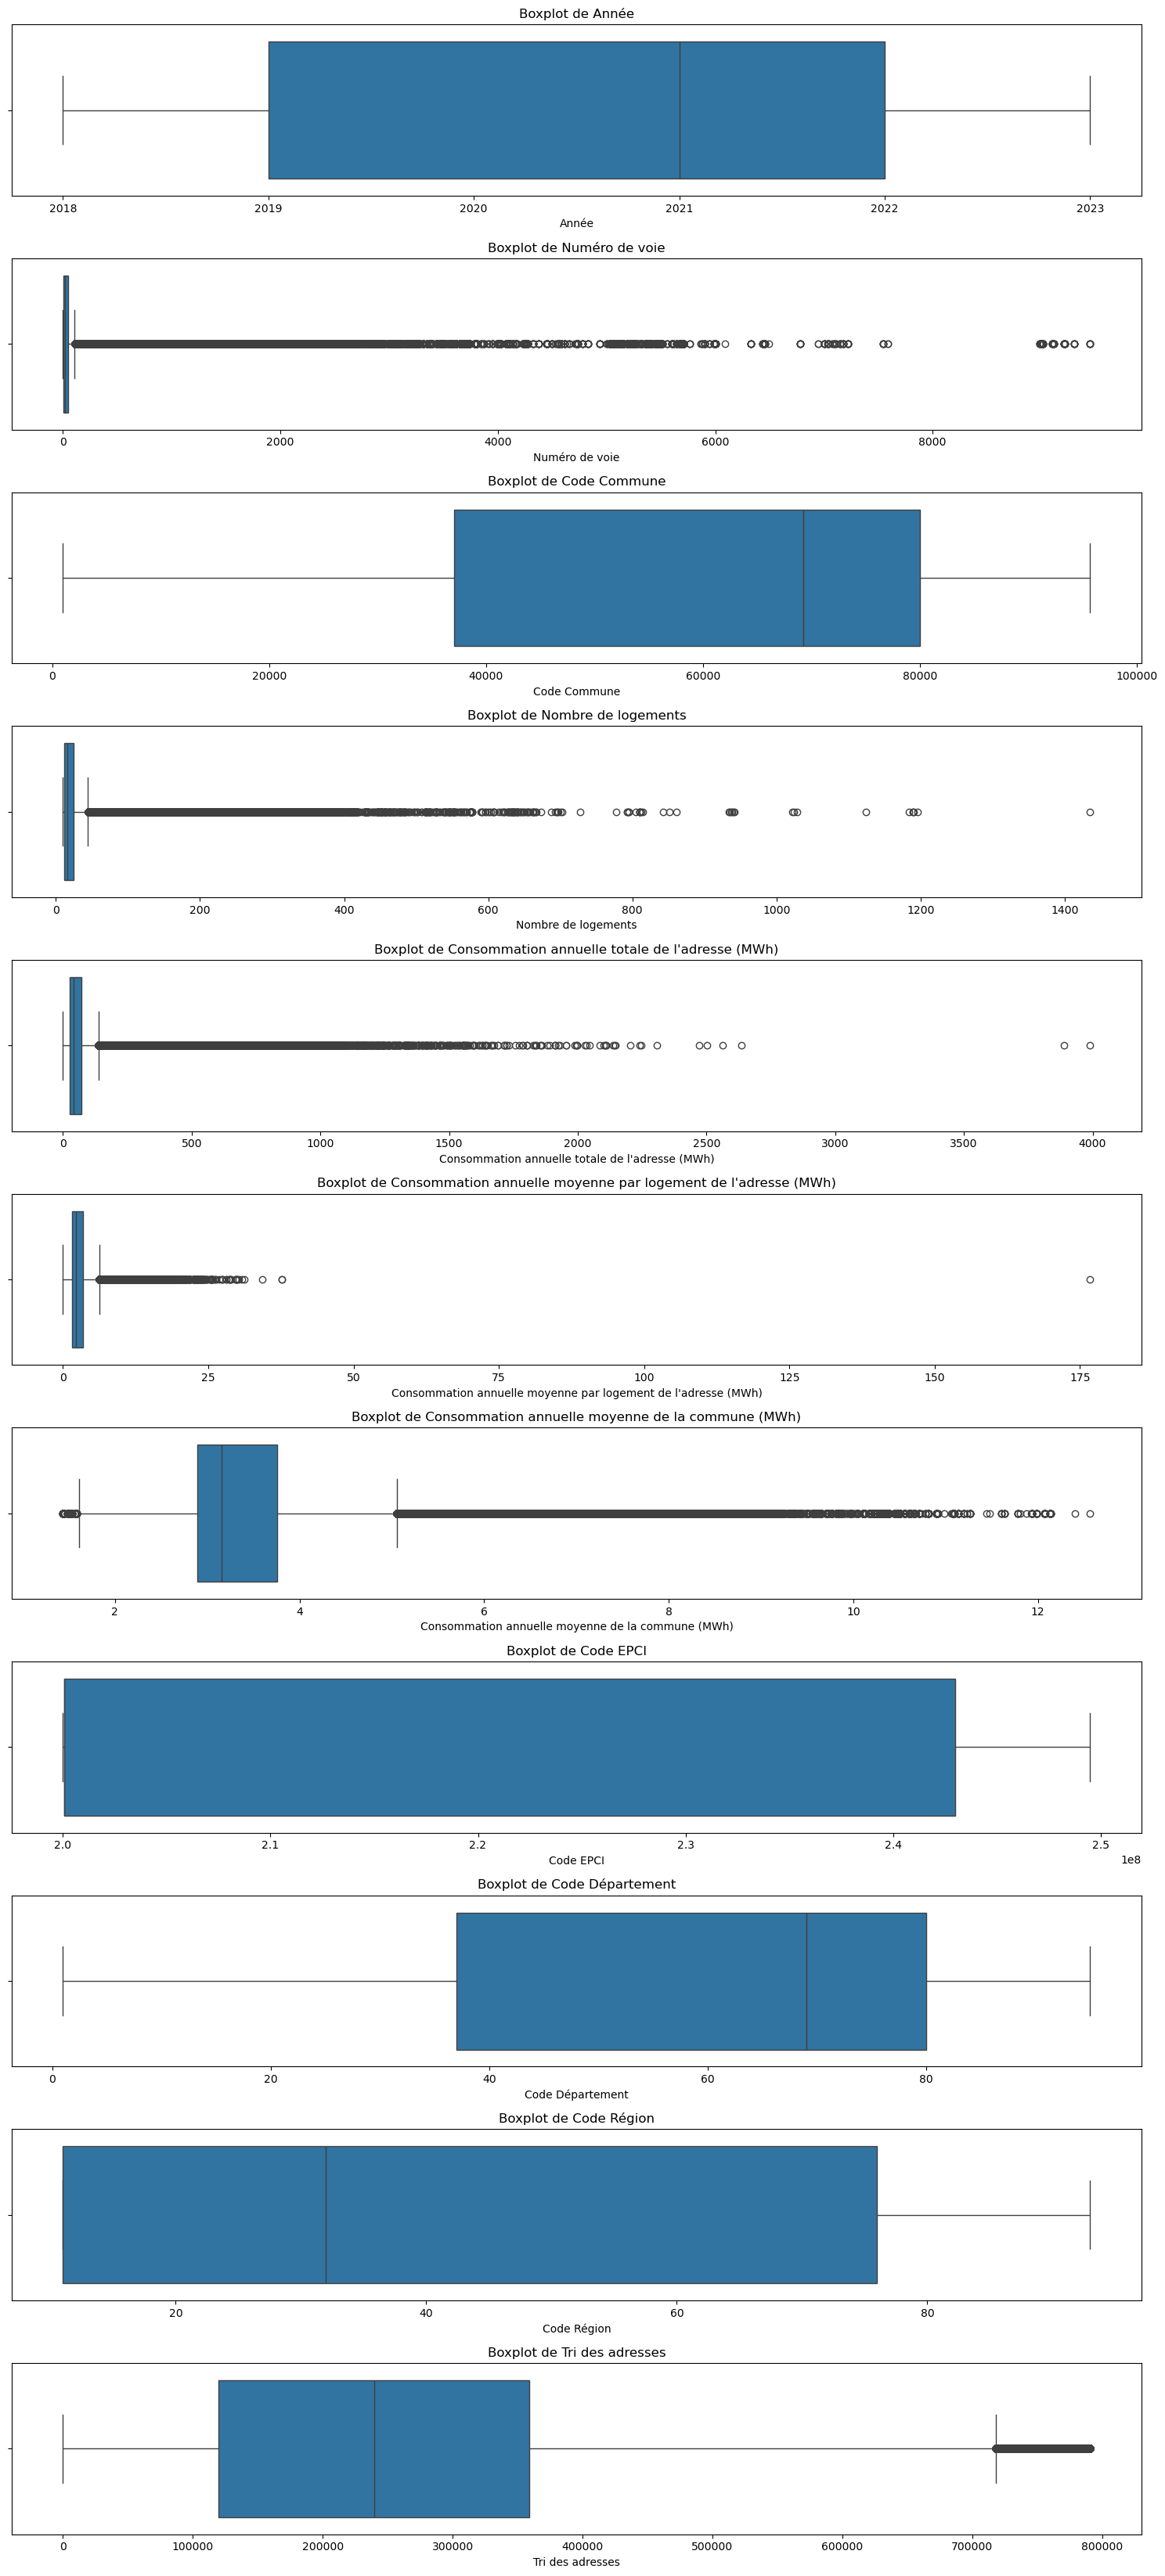

In [33]:
##### Observation graphique
col_num = data_num.columns

# Tracer un boxplot pour chaque colonne numérique
plt.figure(figsize=(15, len(col_num) * 3))  # Ajuster la taille du graphique
for i, col in enumerate(col_num, 1):
    plt.subplot(len(col_num), 1, i)
    sns.boxplot(x=data_num[col])
    plt.title(f"Boxplot de {col}")

plt.tight_layout()
plt.show()

In [22]:
#### Imputation des valeurs aberrantes: 

def remplacer_valeurs_aberrantes(df, liste_colonnes):
    
    for col in liste_colonnes:
        # Calcul des bornes de détection des valeurs aberrantes
        Q1 = df[col].quantile(0.25)  # Premier quartile
        Q3 = df[col].quantile(0.75)  # Troisième quartile
        IQR = Q3 - Q1  # Écart interquartile
        
        borne_inf = Q1 - 1.5 * IQR
        borne_sup = Q3 + 1.5 * IQR
        # Remplacement des valeurs aberrantes par NaN
        df.loc[(df[col] < borne_inf) | (df[col] > borne_sup), col] = np.nan

    return df



In [38]:
data_ = remplacer_valeurs_aberrantes(data_, val_aberrantes["columns"].to_list())

In [40]:
data_.isna().sum()

Année                                                                 0
Code IRIS                                                             0
Nom IRIS                                                              0
Numéro de voie                                                   256713
Type de voie                                                          0
Libellé de voie                                                       0
Code Commune                                                          0
Nom Commune                                                           0
Segment de client                                                     0
Nombre de logements                                              184648
Consommation annuelle totale de l'adresse (MWh)                  169902
Consommation annuelle moyenne par logement de l'adresse (MWh)    105244
Consommation annuelle moyenne de la commune (MWh)                151349
Adresse                                                         

In [46]:
data_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2395046 entries, 0 to 2395045
Data columns (total 18 columns):
 #   Column                                                         Dtype  
---  ------                                                         -----  
 0   Année                                                          int64  
 1   Code IRIS                                                      object 
 2   Nom IRIS                                                       object 
 3   Numéro de voie                                                 float64
 4   Type de voie                                                   object 
 5   Libellé de voie                                                object 
 6   Code Commune                                                   int64  
 7   Nom Commune                                                    object 
 8   Segment de client                                              object 
 9   Nombre de logements                           

In [64]:
data_["Numéro de voie"] = data_["Numéro de voie"].fillna(data_["Numéro de voie"].median())
data_["Nombre de logements"] = data_["Nombre de logements"].fillna(data_["Nombre de logements"].median())
data_["Consommation annuelle totale de l'adresse (MWh)"] = data_["Consommation annuelle totale de l'adresse (MWh)"].fillna(data_["Consommation annuelle totale de l'adresse (MWh)"].median())
data_["Consommation annuelle moyenne par logement de l'adresse (MWh)"] = data_["Consommation annuelle moyenne par logement de l'adresse (MWh)"].fillna(data_["Consommation annuelle moyenne par logement de l'adresse (MWh)"].median())
data_["Consommation annuelle moyenne de la commune (MWh)"] = data_["Consommation annuelle moyenne de la commune (MWh)"].fillna(data_["Consommation annuelle moyenne de la commune (MWh)"].median())


#### Corrélation entre les variable et test du chi2

In [66]:
data_.isna().sum()

Année                                                                0
Code IRIS                                                            0
Nom IRIS                                                             0
Numéro de voie                                                       0
Type de voie                                                         0
Libellé de voie                                                      0
Code Commune                                                         0
Nom Commune                                                          0
Segment de client                                                    0
Nombre de logements                                                  0
Consommation annuelle totale de l'adresse (MWh)                      0
Consommation annuelle moyenne par logement de l'adresse (MWh)        0
Consommation annuelle moyenne de la commune (MWh)                    0
Adresse                                                              0
Code E

In [68]:
data_["Numéro de voie"] = data_["Numéro de voie"].astype(dtype = 'Int64')
data_["Nombre de logements"] = data_["Nombre de logements"].astype(dtype = 'Int64')
data_["Code EPCI"] = data_["Code EPCI"].astype(dtype = 'Int64')
data_["Code Région"] = data_["Code Région"].astype(dtype = 'Int64')
data_["Tri des adresses"] = data_["Tri des adresses"].astype(dtype = 'Int64')


In [67]:
data_.columns

Index(['Année', 'Code IRIS', 'Nom IRIS', 'Numéro de voie', 'Type de voie',
       'Libellé de voie', 'Code Commune', 'Nom Commune', 'Segment de client',
       'Nombre de logements',
       'Consommation annuelle totale de l'adresse (MWh)',
       'Consommation annuelle moyenne par logement de l'adresse (MWh)',
       'Consommation annuelle moyenne de la commune (MWh)', 'Adresse',
       'Code EPCI', 'Code Département', 'Code Région', 'Tri des adresses'],
      dtype='object')

In [69]:
col_obj

Index(['Code IRIS', 'Nom IRIS', 'Type de voie', 'Libellé de voie',
       'Nom Commune', 'Segment de client', 'Adresse'],
      dtype='object')

In [71]:
data_obj = data_.select_dtypes(include=["object"])
data_obj.head()

,Code IRIS,Nom IRIS,Type de voie,Libellé de voie,Nom Commune,Segment de client,Adresse
0,315552005,Observatoire,RUE,JOACHIM GENARD,Toulouse,RESIDENTIEL,8 RUE JOACHIM GENARD
1,315552005,Observatoire,RUE,JOACHIM GENARD,Toulouse,RESIDENTIEL,11 RUE JOACHIM GENARD
2,315552005,Observatoire,RUE,JOACHIM GENARD,Toulouse,RESIDENTIEL,10 RUE JOACHIM GENARD
3,315552005,Observatoire,RUE,JOHANNES KEPLER,Toulouse,RESIDENTIEL,8 RUE JOHANNES KEPLER
4,315552001,Arago,RUE,JOLIMONT,Toulouse,RESIDENTIEL,11 RUE JOLIMONT


In [78]:
data_.columns = [
    'annee', 'code_iris', 'nom_iris', 'numero_voie', 'type_voie',
    'libelle_voie', 'code_commune', 'nom_commune', 'segment_client',
    'nombre_logements', 'conso_annuelle_totale_adresse_mwh',
    'conso_annuelle_moyenne_logement_adresse_mwh',
    'conso_annuelle_moyenne_commune_mwh', 'adresse',
    'code_epci', 'code_departement', 'code_region', 'tri_adresses'
]

# Deuxième jeu  de données: DPE Logements neufs

# Formatage des adresses suivant le format de la BAN

In [111]:
data_

,Unnamed: 0,Année,Code IRIS,Nom IRIS,Numéro de voie,Type de voie,Libellé de voie,Code Commune,Nom Commune,Segment de client,Nombre de logements,Consommation annuelle totale de l'adresse (MWh),Consommation annuelle moyenne par logement de l'adresse (MWh),Consommation annuelle moyenne de la commune (MWh),Adresse,Code EPCI,Code Département,Code Région,Tri des adresses
0,0,2023,315552005,Observatoire,8,RUE,JOACHIM GENARD,31555,Toulouse,RESIDENTIEL,11,19.919,1.811,2.747,8 RUE JOACHIM GENARD,243100518.0,31,76.0,360010
1,1,2023,315552005,Observatoire,11,RUE,JOACHIM GENARD,31555,Toulouse,RESIDENTIEL,10,16.378,1.638,2.747,11 RUE JOACHIM GENARD,243100518.0,31,76.0,360018
2,2,2023,315552005,Observatoire,10,RUE,JOACHIM GENARD,31555,Toulouse,RESIDENTIEL,11,17.500,1.591,2.747,10 RUE JOACHIM GENARD,243100518.0,31,76.0,360019
3,3,2023,315552005,Observatoire,8,RUE,JOHANNES KEPLER,31555,Toulouse,RESIDENTIEL,10,15.853,1.585,2.747,8 RUE JOHANNES KEPLER,243100518.0,31,76.0,360024
4,4,2023,315552001,Arago,11,RUE,JOLIMONT,31555,Toulouse,RESIDENTIEL,21,84.084,4.004,2.747,11 RUE JOLIMONT,243100518.0,31,76.0,360036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395041,2395041,2019,660170000,Le Barcarès (commune non irisée),1,RUE,PIERRE RACINE,66017,Le Barcarès,RESIDENTIEL,31,47.654,1.537,1.822,1 RUE PIERRE RACINE,200027183.0,66,76.0,135148
2395042,2395042,2019,330290000,Le Barp (commune non irisée),69,CHEMIN,DE TUTOU,33029,Le Barp,RESIDENTIEL,24,84.925,3.539,7.177,69 CHEMIN DE TUTOU,243301405.0,33,75.0,135154
2395043,2395043,2019,330290000,Le Barp (commune non irisée),10,RUE,LOU PIGNOT,33029,Le Barp,RESIDENTIEL,17,71.217,4.189,7.177,10 RUE LOU PIGNOT,243301405.0,33,75.0,135160
2395044,2395044,2019,830160103,Les 4 Freres-Les Cancades-Les Ginestes,1195,CHEMIN,DE LA FONT DE 5 SOUS,83016,Le Beausset,RESIDENTIEL,12,102.623,8.552,6.600,1195 CHEMIN DE LA FONT DE 5 SOUS,248300394.0,83,93.0,135169


In [79]:
import requests
import concurrent.futures
import time

In [62]:
data_[data_["Consommation annuelle totale de l'adresse (MWh)"] == 137.726]

,Année,Code IRIS,Nom IRIS,Numéro de voie,Type de voie,Libellé de voie,Code Commune,Nom Commune,Segment de client,Nombre de logements,Consommation annuelle totale de l'adresse (MWh),Consommation annuelle moyenne par logement de l'adresse (MWh),Consommation annuelle moyenne de la commune (MWh),Adresse,Code EPCI,Code Département,Code Région,Tri des adresses
294077,2019,624270106,quartier de la gare,66.0,RUE,JACQUES PREVERT,62427,Hénin-Beaumont,RESIDENTIEL,28.0,137.726,4.919,4.203,66 RUE JACQUES PREVERT,246200299.0,62,32.0,118288.0


In [134]:
adresses = data_["Adresse"].unique()

In [138]:
#### Teste avec une adresse aléatoire dans notre jeu de données
adresse = data_["Adresse"].iloc[150]

url = f"https://api-adresse.data.gouv.fr/search/?q={adresse}"
response = requests.get(url)
res = response.json()
res

ConnectTimeout: HTTPSConnectionPool(host='api-adresse.data.gouv.fr', port=443): Max retries exceeded with url: /search/?q=8%20RUE%20ROBERT%20BAJAC (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x000001D01E2DA3C0>, 'Connection to api-adresse.data.gouv.fr timed out. (connect timeout=None)'))

In [143]:
res['features'][0]['properties']['context'].split(",")[1].strip()

'Haute-Garonne'

In [147]:
props = res["features"][0]["properties"]
props["label"], props.get("postcode", ""), props.get("city", "")

'31500'

# 📌 Explication des champs de la réponse de l'API BAN

## 🔹 Métadonnées générales
- **type** : Type de réponse (`FeatureCollection`, collection de résultats)
- **version** : Version du format de données (`draft`, peut évoluer)
- **attribution** : Source des données (`BAN`)
- **licence** : Licence des données (`ETALAB-2.0`)
- **query** : Adresse qui a été recherchée (`8 RUE JOACHIM GENARD`)
- **limit** : Nombre maximum de résultats retournés (`5`)

## 🔹 Données de l'adresse trouvée (contenue dans `features`)
Chaque élément de `features` est un **Feature**, contenant :
  
### 📍 **Coordonnées géographiques**
- **geometry.type** : Type de géométrie (`Point`, un seul point en 2D)
- **geometry.coordinates** : Coordonnées GPS **(longitude, latitude)** `[1.465348, 43.612736]`

### 🏠 **Informations sur l'adresse**
- **properties.label** : Adresse complète normalisée (`8 Rue Joachim Genard 31500 Toulouse`)
- **properties.name** : Adresse sans le code postal (`8 Rue Joachim Genard`)
- **properties.housenumber** : Numéro de la maison (`8`)
- **properties.street** : Nom de la rue (`Rue Joachim Genard`)
- **properties.city** : Nom de la ville (`Toulouse`)
- **properties.citycode** : Code INSEE de la ville (`31555`)
- **properties.postcode** : Code postal (`31500`)
- **properties.context** : Région et département (`31, Haute-Garonne, Occitanie`)
- **properties.type** : Type de l'entité (`housenumber`, numéro de maison)

### 📊 **Données complémentaires**
- **properties.score** : Score de correspondance entre la requête et la réponse (`0.9771654545454546`, proche de 1 = très précis)
- **properties.importance** : Niveau d'importance de l'adresse (`0.74882`, plus c'est élevé, plus c'est pertinent)
- **properties.id** : Identifiant unique BAN de l'adresse (`31555_4695_00008`)
- **properties.banId** : Identifiant unique dans la base de données (`575c9dd5-a897-4b0c-a0ce-220e16d0e1b3`)
- **properties.x** : Coordonnée X en projection Lambert 93 (`576082.82`)
- **properties.y** : Coordonnée Y en projection Lambert 93 (`6280502.5`)


In [117]:
### Nous allons créer les variables: `Département`, `Région`, enfin d'enrichir notre jeu de données pour une meilleure anlyse
### Aussi, nous allons creer nouveau champs `adresses_complet` pour une meilleure différentiation des adresse.


def normaliser_les_adresses(adresse):

    # Valeurs par défaut pour éviter l'erreur
    adresse_normaliser = ""
    region_departement = ""
    
    url = f"https://api-adresse.data.gouv.fr/search/?q={adresse}"
    response = requests.get(url, timeout=5)
    if response.status_code == 200: 
        res = response.json()
        if res["features"]:  # Vérifier si une adresse a été trouvée
            data = res["features"][0]["properties"]
            adresse_normaliser = data.get("label","")
            region_departement = data.get('context', "")
        

    return adresse_normaliser, region_departement

def normaliser_une_adresse_GPT(adresse, retries=3, delay=2):
    """
    Normalise une adresse en utilisant l'API de data.gouv.fr
    avec gestion des erreurs et retries en cas d'échec.
    """
    url = f"https://api-adresse.data.gouv.fr/search/?q={adresse}"
    addresse_introuvable = []
    for i in range(retries):
        try:
            response = requests.get(url, timeout=5)
            if response.status_code == 200:
                res = response.json()
                if res.get("features"):
                    data = res["features"][0]["properties"]
                    return data.get("label", ""), data.get("context", "")
        except requests.exceptions.RequestException as e:
            print(f"Erreur ({e}), tentative {i+1}/{retries} pour l'adresse: {adresse}")
            addresse_introuvable.append(adresse)
            time.sleep(delay)
    return "", ""   # Retourne des valeurs vides en cas d'échec

def normaliser_les_adresses_liste(adresses, max_workers=10):
    """
    Normalise une liste d'adresses en utilisant du parallélisme pour accélérer le processus.
    """
    with concurrent.futures.ThreadPoolExecutor(max_workers=max_workers) as executor:
        resultats = list(executor.map(normaliser_une_adresse_GPT, adresses))
    return resultats

In [111]:
# pas = int(round((data_.shape[0] / 5), 0))
# sample = data_.iloc[:pas]

In [136]:
resultat = {}
for adr in adresses: 
    ban_adress, region_departement = normaliser_les_adresses(adr)
    resultat[adr] = ban_adress
    resultat[region] = region_departement

ConnectTimeout: HTTPSConnectionPool(host='api-adresse.data.gouv.fr', port=443): Max retries exceeded with url: /search/?q=8%20RUE%20JOACHIM%20GENARD (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x000001D01E653110>, 'Connection to api-adresse.data.gouv.fr timed out. (connect timeout=5)'))

In [ ]:
resultat

In [132]:
#resultats = normaliser_les_adresses_liste(sample["Adresse"])

In [130]:
#data_[["Adresse normalisee","region_departement" ]] = data_["Adresse"].apply(lambda adr: pd.Series(normaliser_les_adresses(adr)))

In [163]:
# data_

,Unnamed: 0,Année,Code IRIS,Nom IRIS,Numéro de voie,Type de voie,Libellé de voie,Code Commune,Nom Commune,Segment de client,Nombre de logements,Consommation annuelle totale de l'adresse (MWh),Consommation annuelle moyenne par logement de l'adresse (MWh),Consommation annuelle moyenne de la commune (MWh),Adresse,Code EPCI,Code Département,Code Région,Tri des adresses
0,0,2023,315552005,Observatoire,8,RUE,JOACHIM GENARD,31555,Toulouse,RESIDENTIEL,11,19.919,1.811,2.747,8 RUE JOACHIM GENARD,243100518.0,31,76.0,360010
1,1,2023,315552005,Observatoire,11,RUE,JOACHIM GENARD,31555,Toulouse,RESIDENTIEL,10,16.378,1.638,2.747,11 RUE JOACHIM GENARD,243100518.0,31,76.0,360018
2,2,2023,315552005,Observatoire,10,RUE,JOACHIM GENARD,31555,Toulouse,RESIDENTIEL,11,17.500,1.591,2.747,10 RUE JOACHIM GENARD,243100518.0,31,76.0,360019
3,3,2023,315552005,Observatoire,8,RUE,JOHANNES KEPLER,31555,Toulouse,RESIDENTIEL,10,15.853,1.585,2.747,8 RUE JOHANNES KEPLER,243100518.0,31,76.0,360024
4,4,2023,315552001,Arago,11,RUE,JOLIMONT,31555,Toulouse,RESIDENTIEL,21,84.084,4.004,2.747,11 RUE JOLIMONT,243100518.0,31,76.0,360036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395041,2395041,2019,660170000,Le Barcarès (commune non irisée),1,RUE,PIERRE RACINE,66017,Le Barcarès,RESIDENTIEL,31,47.654,1.537,1.822,1 RUE PIERRE RACINE,200027183.0,66,76.0,135148
2395042,2395042,2019,330290000,Le Barp (commune non irisée),69,CHEMIN,DE TUTOU,33029,Le Barp,RESIDENTIEL,24,84.925,3.539,7.177,69 CHEMIN DE TUTOU,243301405.0,33,75.0,135154
2395043,2395043,2019,330290000,Le Barp (commune non irisée),10,RUE,LOU PIGNOT,33029,Le Barp,RESIDENTIEL,17,71.217,4.189,7.177,10 RUE LOU PIGNOT,243301405.0,33,75.0,135160
2395044,2395044,2019,830160103,Les 4 Freres-Les Cancades-Les Ginestes,1195,CHEMIN,DE LA FONT DE 5 SOUS,83016,Le Beausset,RESIDENTIEL,12,102.623,8.552,6.600,1195 CHEMIN DE LA FONT DE 5 SOUS,248300394.0,83,93.0,135169


In [74]:
from sqlalchemy import create_engine

In [80]:
#### Chargement dans la base de données Postgres
# Paramètres de connexion à PostgreSQL
host = "localhost"  # ou l'IP du serveur PostgreSQL
database = "Projet_DPE"
user = "postgres"
password = "challenge"
table_name = "Consommation_Annuelle"

# Créer une connexion à PostgreSQL
engine = create_engine(f"postgresql://{user}:{password}@{host}/{database}")

# Enregistrement du DataFrame dans PostgreSQL
data_.to_sql(table_name, engine, if_exists="replace", index=False)

print("Dataset enregistré avec succès dans la base de données PostgreSQL !")

Dataset enregistré avec succès dans la base de données PostgreSQL !
